In [38]:
PollTrainImp = read.csv("pollTrain_imputed.csv")
PollTestImp = read.csv("pollTest_imputed.csv")

In [39]:
library(caTools)

In [40]:
PollTrainImp$Party = ifelse(PollTrainImp$Party=="Democrat",1,0)
table(PollTrainImp$Party)






   0    1 
2617 2951 

In [41]:
split = sample.split(PollTrainImp$Party, SplitRatio = 0.75)

In [42]:
PollTrainImp$Party = as.factor(PollTrainImp$Party)

In [43]:
PollTrainImp$USER_ID = NULL
str(PollTrainImp)

'data.frame':	5568 obs. of  107 variables:
 $ YOB            : int  1938 1970 1997 1983 1984 1997 1983 1996 1994 1981 ...
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 1 2 2 1 1 2 2 2 1 ...
 $ Income         : Factor w/ 6 levels "$100,001 - $150,000",..: 4 5 4 1 3 5 2 4 6 3 ...
 $ HouseholdStatus: Factor w/ 6 levels "Domestic Partners (no kids)",..: 4 2 5 4 4 5 3 5 5 4 ...
 $ EducationLevel : Factor w/ 7 levels "Associate's Degree",..: 2 2 6 2 6 3 4 3 3 2 ...
 $ Party          : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 2 1 1 1 ...
 $ Q124742        : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ Q124122        : Factor w/ 2 levels "No","Yes": 1 2 2 2 2 1 1 2 1 1 ...
 $ Q123464        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 1 1 2 1 ...
 $ Q123621        : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 2 1 1 1 ...
 $ Q122769        : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 2 1 2 2 ...
 $ Q122770        : Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 1 2 2 1 ...
 $

In [44]:
Train = subset(PollTrainImp, split == TRUE)
Test = subset(PollTrainImp, split == FALSE)

In [45]:
#LogModel = glm(Party~., data = Train, family = binomial)

In [46]:
#PredTrain = predict(LogModel, type = "response")

In [47]:
Train_for_clust = Train

Train_for_clust$Party = NULL

distances = dist(Train_for_clust, method = "euclidean")

Warning message:
In dist(Train_for_clust, method = "euclidean"): NAs introduced by coercion

In [48]:
summary(distances)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   61.77  144.10  176.20  257.40 1637.00 

In [49]:
var(distances)

[1] 19922.67

In [50]:
clusterGrps = hclust(distances, method = "ward")

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


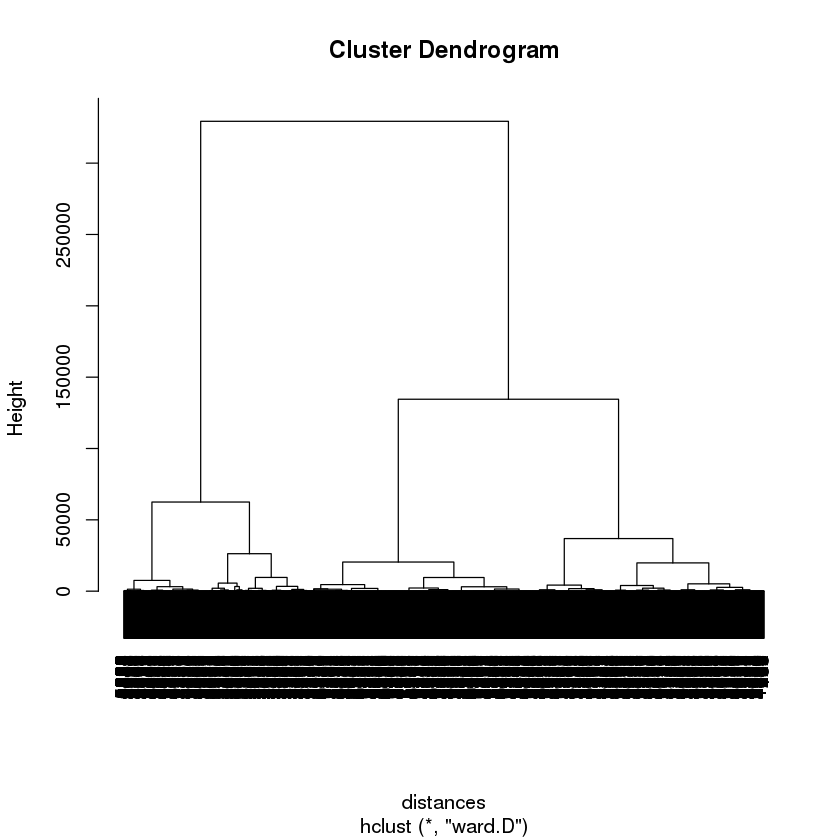

In [51]:
plot(clusterGrps)

In [52]:
clusterGroups = cutree(clusterGrps, k = 2)

In [53]:
str(clusterGroups)

 Named int [1:4176] 1 1 2 2 2 2 2 2 2 2 ...
 - attr(*, "names")= chr [1:4176] "1" "2" "4" "5" ...


In [54]:
table(clusterGroups)

clusterGroups
   1    2 
1237 2939 

In [55]:
cluster1 = subset(Train,clusterGroups==1)
cluster2 = subset(Train, clusterGroups==2)

In [56]:
table(cluster1$Party)


  0   1 
582 655 

In [57]:
table(cluster2$Party)


   0    1 
1381 1558 

In [59]:
library(flexclust)

In [60]:
Test_for_clust = Test
Test_for_clust$Party = NULL

In [61]:
Test_for_clust = lapply(Test_for_clust,as.numeric)
str(Test_for_clust)

List of 106
 $ YOB            : num [1:1392] 1997 1971 1973 1993 1942 ...
 $ Gender         : num [1:1392] 2 2 2 1 2 2 1 2 2 1 ...
 $ Income         : num [1:1392] 4 5 4 3 1 1 4 2 3 3 ...
 $ HouseholdStatus: num [1:1392] 5 3 4 1 4 4 5 6 5 5 ...
 $ EducationLevel : num [1:1392] 6 2 1 6 7 5 3 6 6 2 ...
 $ Q124742        : num [1:1392] 1 2 1 2 1 2 1 2 2 1 ...
 $ Q124122        : num [1:1392] 2 2 2 2 1 2 1 2 1 2 ...
 $ Q123464        : num [1:1392] 2 1 1 1 1 1 2 1 1 1 ...
 $ Q123621        : num [1:1392] 1 2 2 1 1 2 1 2 2 1 ...
 $ Q122769        : num [1:1392] 2 1 1 2 1 1 1 1 2 1 ...
 $ Q122770        : num [1:1392] 2 2 1 1 1 2 2 1 2 1 ...
 $ Q122771        : num [1:1392] 1 2 2 2 1 2 2 2 2 2 ...
 $ Q122120        : num [1:1392] 1 2 1 1 1 1 2 1 1 1 ...
 $ Q121699        : num [1:1392] 1 2 2 2 1 2 1 2 2 2 ...
 $ Q121700        : num [1:1392] 1 1 1 1 1 2 1 1 1 1 ...
 $ Q120978        : num [1:1392] 2 1 1 1 1 2 2 2 1 2 ...
 $ Q121011        : num [1:1392] 1 2 1 1 1 2 2 1 2 2 ...
 $ Q120379    

In [62]:
Train_for_clust = lapply(Train_for_clust,as.numeric)
str(Train_for_clust)

List of 106
 $ YOB            : num [1:4176] 1938 1970 1983 1984 1997 ...
 $ Gender         : num [1:4176] 2 1 2 1 1 2 2 2 1 1 ...
 $ Income         : num [1:4176] 4 5 1 3 5 2 4 6 3 1 ...
 $ HouseholdStatus: num [1:4176] 4 2 4 4 5 3 5 5 4 1 ...
 $ EducationLevel : num [1:4176] 2 2 2 6 3 4 3 3 2 2 ...
 $ Q124742        : num [1:4176] 1 1 1 1 1 1 2 1 1 2 ...
 $ Q124122        : num [1:4176] 1 2 2 2 1 1 2 1 1 1 ...
 $ Q123464        : num [1:4176] 1 1 1 1 1 1 1 2 1 1 ...
 $ Q123621        : num [1:4176] 1 1 2 1 1 2 1 1 1 2 ...
 $ Q122769        : num [1:4176] 1 1 1 1 1 2 1 2 2 2 ...
 $ Q122770        : num [1:4176] 2 2 1 2 2 1 2 2 1 1 ...
 $ Q122771        : num [1:4176] 2 2 2 2 2 2 1 2 2 2 ...
 $ Q122120        : num [1:4176] 1 1 1 1 1 1 2 2 1 1 ...
 $ Q121699        : num [1:4176] 2 2 2 2 1 2 1 1 2 2 ...
 $ Q121700        : num [1:4176] 1 1 1 1 1 1 1 1 1 1 ...
 $ Q120978        : num [1:4176] 1 2 2 2 2 2 1 2 2 2 ...
 $ Q121011        : num [1:4176] 1 1 1 2 1 2 1 1 2 2 ...
 $ Q120379    

In [65]:
set.seed(144)


ERROR: Error in kmeans(Train_for_clust, centers = 2): (list) object cannot be coerced to type 'double'


In [64]:
#write.csv(Test_for_clust, "Test_clust.csv", row.names=FALSE)

In [66]:
class(Test_for_clust)

[1] "list"

In [67]:
#write.csv(Train_for_clust, "Train_clust.csv", row.names=FALSE)

In [68]:
Train_for_clust = read.csv("Train_clust.csv")
Test_for_clust = read.csv("Test_clust.csv")

In [69]:
str(Train_for_clust)

'data.frame':	4176 obs. of  106 variables:
 $ YOB            : int  1938 1970 1983 1984 1997 1983 1996 1994 1981 1977 ...
 $ Gender         : int  2 1 2 1 1 2 2 2 1 1 ...
 $ Income         : int  4 5 1 3 5 2 4 6 3 1 ...
 $ HouseholdStatus: int  4 2 4 4 5 3 5 5 4 1 ...
 $ EducationLevel : int  2 2 2 6 3 4 3 3 2 2 ...
 $ Q124742        : int  1 1 1 1 1 1 2 1 1 2 ...
 $ Q124122        : int  1 2 2 2 1 1 2 1 1 1 ...
 $ Q123464        : int  1 1 1 1 1 1 1 2 1 1 ...
 $ Q123621        : int  1 1 2 1 1 2 1 1 1 2 ...
 $ Q122769        : int  1 1 1 1 1 2 1 2 2 2 ...
 $ Q122770        : int  2 2 1 2 2 1 2 2 1 1 ...
 $ Q122771        : int  2 2 2 2 2 2 1 2 2 2 ...
 $ Q122120        : int  1 1 1 1 1 1 2 2 1 1 ...
 $ Q121699        : int  2 2 2 2 1 2 1 1 2 2 ...
 $ Q121700        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Q120978        : int  1 2 2 2 2 2 1 2 2 2 ...
 $ Q121011        : int  1 1 1 2 1 2 1 1 2 2 ...
 $ Q120379        : int  1 1 1 1 2 2 2 2 1 2 ...
 $ Q120650        : int  2 2 2 2 2 2 2 2 2 2 

In [70]:
km = kmeans(Train_for_clust, centers = 2)

In [71]:
table(km$cluster)


   1    2 
2731 1445 

In [72]:
km.kcca = as.kcca(km,Train_for_clust)

In [73]:
clusterTrain = predict(km.kcca)

In [74]:
clusterTest = predict(km.kcca, newdata = Test_for_clust)

In [75]:
pollTrain1 = subset(Train, clusterTrain == 1)
pollTrain2 = subset(Train, clusterTrain == 2)

pollTest1 = subset(Test, clusterTest == 1)
pollTest2 = subset(Test, clusterTest == 2)

In [77]:
model1 = glm(Party~., data = pollTrain1, family = binomial)
model2 = glm(Party~., data = pollTrain2, family = binomial)

In [78]:
predTest1 = predict(model1, newdata = pollTest1, type = "response")

In [80]:
table(pollTest1$Party)


  0   1 
426 477 

In [81]:
summary(predTest1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07952 0.38980 0.52340 0.52450 0.66050 0.92360 

In [85]:
t=table(pollTest1$Party,predTest1>0.5)
t
sum(diag(t))/sum(t)

   
    FALSE TRUE
  0   230  196
  1   180  297

[1] 0.5836102

In [87]:
predTest2 = predict(model2, newdata = pollTest2, type = "response")

In [88]:
table(pollTest2$Party, predTest2>0.5)

   
    FALSE TRUE
  0   132   96
  1    98  163

In [91]:
cor(as.numeric(pollTrain1$EducationLevel), as.numeric(pollTrain1$Party))

[1] 0.03751013

In [92]:
names(Train)

[1] "YOB"             "Gender"          "Income"          "HouseholdStatus"
  [5] "EducationLevel"  "Party"           "Q124742"         "Q124122"        
  [9] "Q123464"         "Q123621"         "Q122769"         "Q122770"        
 [13] "Q122771"         "Q122120"         "Q121699"         "Q121700"        
 [17] "Q120978"         "Q121011"         "Q120379"         "Q120650"        
 [21] "Q120472"         "Q120194"         "Q120012"         "Q120014"        
 [25] "Q119334"         "Q119851"         "Q119650"         "Q118892"        
 [29] "Q118117"         "Q118232"         "Q118233"         "Q118237"        
 [33] "Q117186"         "Q117193"         "Q116797"         "Q116881"        
 [37] "Q116953"         "Q116601"         "Q116441"         "Q116448"        
 [41] "Q116197"         "Q115602"         "Q115777"         "Q115610"        
 [45] "Q115611"         "Q115899"         "Q115390"         "Q114961"        
 [49] "Q114748"         "Q115195"         "Q114517"         "Q114386"        
 [53] "Q113992"         "Q114152"         "Q113583"         "Q113584"        
 [57] "Q113181"         "Q112478"         "Q112512"         "Q112270"        
 [61] "Q111848"         "Q111580"         "Q111220"         "Q110740"        
 [65] "Q109367"         "Q108950"         "Q109244"         "Q108855"        
 [69] "Q108617"         "Q108856"         "Q108754"         "Q108342"        
 [73] "Q108343"         "Q107869"         "Q107491"         "Q106993"        
 [77] "Q106997"         "Q106272"         "Q106388"         "Q106389"        
 [81] "Q106042"         "Q105840"         "Q105655"         "Q104996"        
 [85] "Q103293"         "Q102906"         "Q102674"         "Q102687"        
 [89] "Q102289"         "Q102089"         "Q101162"         "Q101163"        
 [93] "Q101596"         "Q100689"         "Q100680"         "Q100562"        
 [97] "Q99982"          "Q100010"         "Q99716"          "Q99581"         
[101] "Q99480"          "Q98869"          "Q98578"          "Q98059"         
[105] "Q98078"          "Q98197"          "Q96024"

In [97]:
cor(Train_for_clust$EducationLevel, as.numeric(Train$Party))

[1] 0.04666868

In [103]:
cor(as.numeric(pollTrain1$Q96024), as.numeric(pollTrain1$Party))

[1] -0.02458312